<a href="https://colab.research.google.com/github/keerthana-narra/Airline-passenger-reviews/blob/main/N_Sai_Keerthana_Reddy_Capstone_3_Airline_Referal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement -
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with
multiple choice and free text questions. Data is scraped in Spring 2019. The main objective
is to predict whether passengers will refer the airline to their friends.



## Loading data and Importing libraries



In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_palette('Set2')

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk import tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

import datetime as dt
import dateutil

import importlib


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
missing_values = ['N/a', 'na', 'np-nan','None', 'none']

In [4]:
#Reading data
data = pd.read_excel("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/capstone projects/capstone-3/Copy of data_airline_reviews.xlsx", na_values= missing_values)

### Understanding data

In [5]:
#Shape of dataset
data.shape

(131895, 17)

In [6]:
# Columns present in the dataset
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

Feature descriptions briefly as follows:

airline: Name of the airline.

overall: Overall point is given to the trip between 1 to 10.

author: Author of the trip

reviewdate: Date of the Review customer review: Review of the customers in free text format

aircraft: Type of the aircraft

travellertype: Type of traveler (e.g. business, leisure)

cabin: Cabin at the flight date flown: Flight date

seatcomfort: Rated between 1-5

cabin service: Rated between 1-5

foodbev: Rated between 1-5 entertainment: Rated between 1-5

groundservice: Rated between 1-5

valueformoney: Rated between 1-5

recommended: Binary, target variable.

In [7]:
#Acessing top 5 rows
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Describing data
data.describe()



,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
# Checking for null values
data.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

There are more number of null values in the data set. Cleaning of data becomes very important.

## Cleaning data

### Droping rows

In [10]:
# dropping rows if the entire row is null
data.dropna(how = 'all',inplace = True)

In [11]:
# Removing columns that are not required
data.drop(columns = ['aircraft','author'],inplace = True) 

In [12]:
# Renaming columns
data.rename(columns={'overall':'review_score', 'customer_review':'review_text'}, inplace=True)


In [13]:
data.shape

(65947, 15)

That means 50% of given data is not at all required.

In [14]:
# Checking for null values
data.isnull().sum()

airline                0
review_score        1930
review_date            0
review_text            0
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

### Finding and droping duplicates

In [15]:
# Checking the presence of duplicated data
data[data.duplicated(keep =False)].head(2)


,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2173,Turkish Airlines,8.0,19th March 2015,LIS-IST B737-800. Check in OK. Flight on Time....,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,3.0,NaN,4.0,yes
2183,Turkish Airlines,8.0,19th March 2015,LIS-IST B737-800. Check in OK. Flight on Time....,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,3.0,NaN,4.0,yes


We dont need to know the name of the person. Aircraft is dropped because most of column is null value and it cant be filled.

In [16]:
# Conforming the presence of duplicated data
data[data['review_text']== data.loc[2257,:]['review_text']]


,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2257,Turkish Airlines,1.0,19th January 2015,Flew back with TK 1955 business class from Ist...,NaN,Business Class,NaN,NaN,1.0,4.0,2.0,1.0,NaN,1.0,no
2263,Turkish Airlines,1.0,19th January 2015,Flew back with TK 1955 business class from Ist...,NaN,Business Class,NaN,NaN,1.0,4.0,2.0,1.0,NaN,1.0,no


In [17]:
#Dropping the duplicates by keeping the first occurence
data = data.drop_duplicates(keep= 'first')


In [18]:
data[['review_date','date_flown']].dtypes


review_date    object
date_flown     object
dtype: object

In [19]:
data.isnull().sum()

airline                0
review_score        1782
review_date            0
review_text            0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [20]:
# Copy data to airline_data data frame
airline_data = data.copy()


In [21]:
airline_data.head(2)

,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no


In [22]:
print(" Total no.of rows in given data ", data.shape[0])
print("No.of rows with null values in all columns", data.shape[0] - airline_data.shape[0])
print("% of rows without complete null values", (airline_data.shape[0]/data.shape[0])*100)

 Total no.of rows in given data  61183
No.of rows with null values in all columns 0
% of rows without complete null values 100.0


Now we need fill the missing values. 

#### Scaling review columns to 10

In [23]:
def scaled_feature(feature_to_be_scaled):
  '''scaling entire column by multiplying by 2 so that all ratings are given out of 10'''
  airline_data[feature_to_be_scaled] = airline_data[feature_to_be_scaled]*2
  

In [24]:
scaled_feature('seat_comfort')
scaled_feature('cabin_service')
scaled_feature('food_bev')
scaled_feature('entertainment')
scaled_feature('ground_service')
scaled_feature('value_for_money')



In [25]:
airline_data.head(2)
                  

,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,8.0,10.0,8.0,8.0,4.0,8.0,yes
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,8.0,2.0,2.0,2.0,2.0,2.0,no


### Ploting 

In [26]:
#Stacked plot of rating features
def stacked_plot(feat):
  ''' Stacked plot of rating features'''
  x = airline_data.groupby([airline_data['review_score']])
  x[feat].value_counts().unstack().plot(kind= 'bar',stacked = True, figsize=(12,6))






In [27]:
review_features = ['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

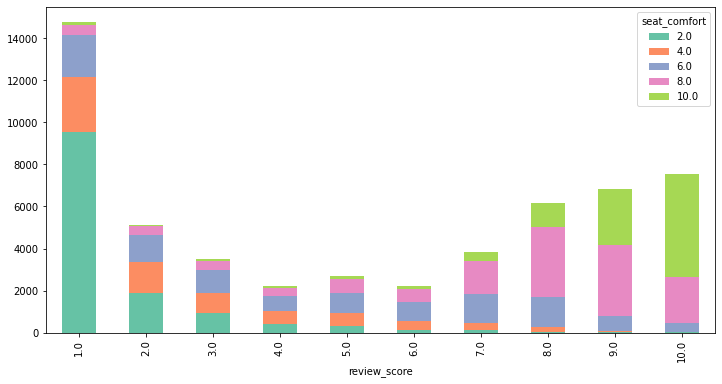

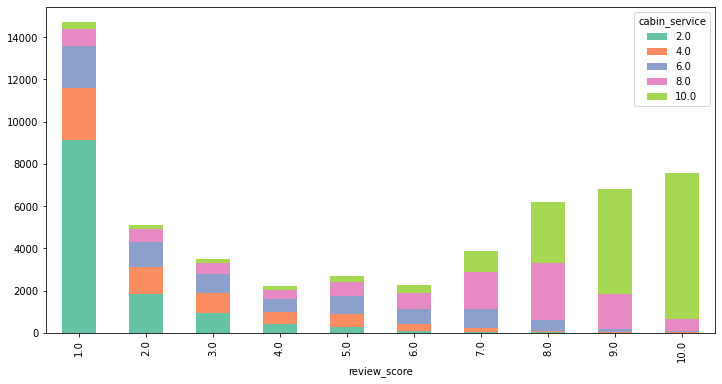

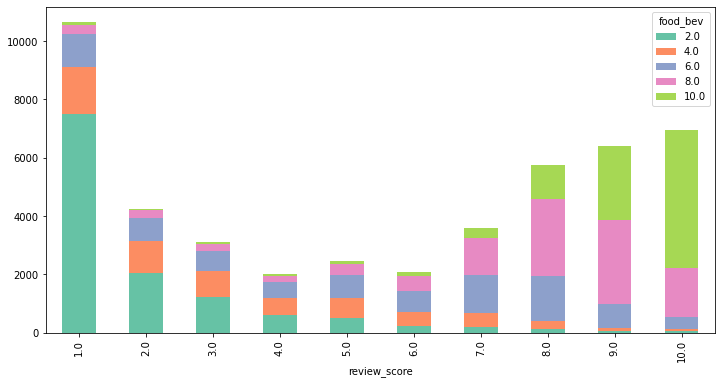

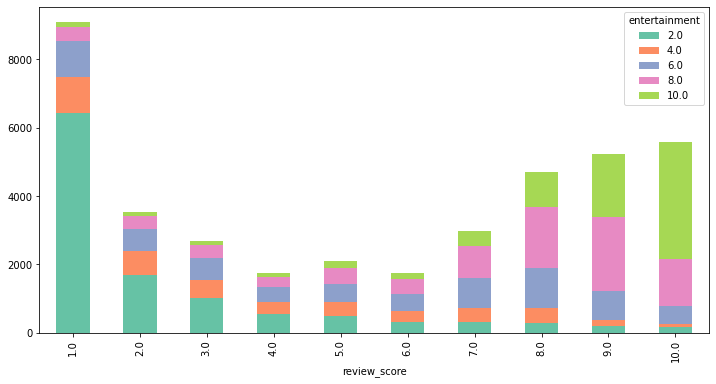

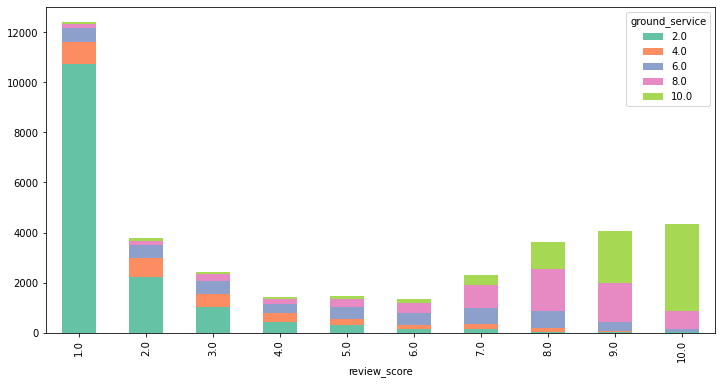

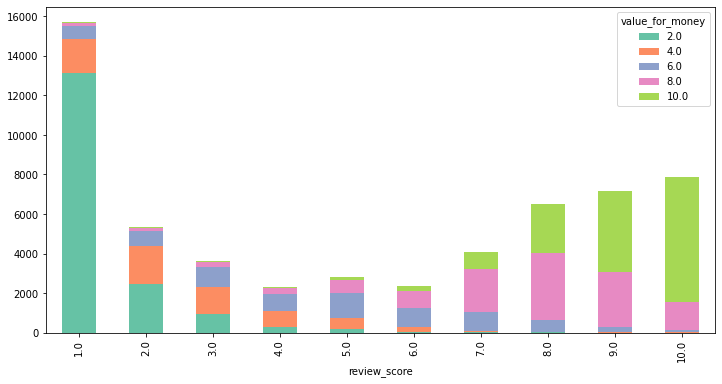

In [28]:
for feat in review_features:
  stacked_plot(feat)

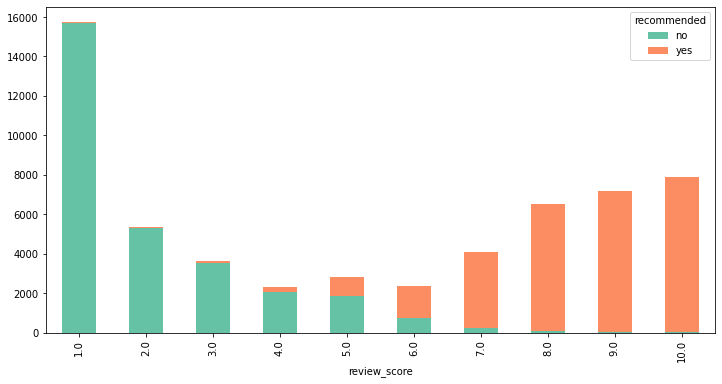

In [29]:
stacked_plot('recommended')

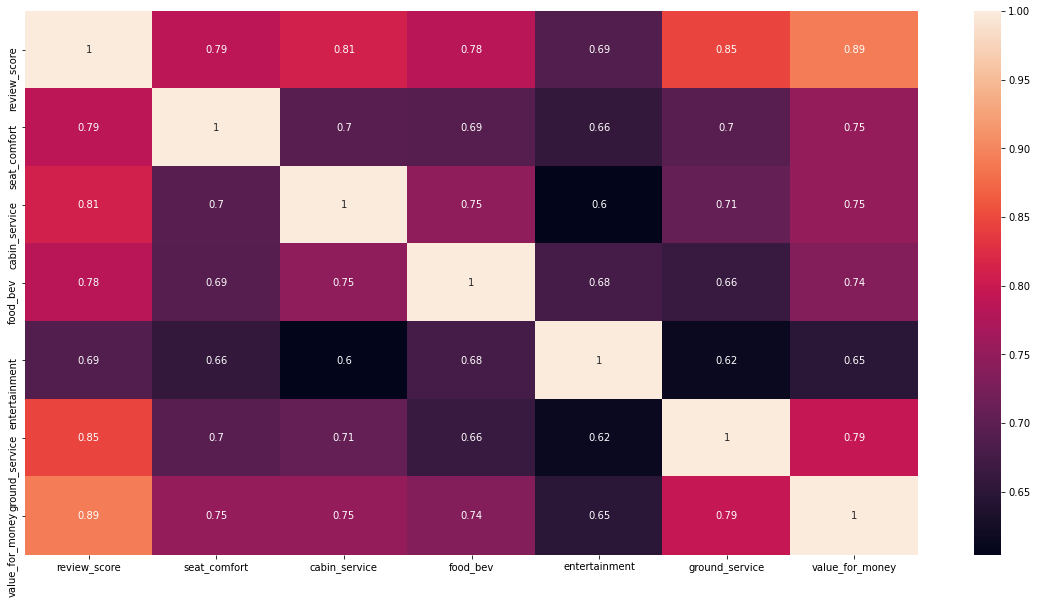

In [30]:
cor_matrix =abs( airline_data.corr())
# Get heatmap of correlation matrix on the dataset
plt.figure(figsize=(20,10))
sns.heatmap(cor_matrix,annot = True)

## Feature Engineering

**Filling** review columns
For filling review score take average of seat_comfort, cabin_service, food_bev, entertainment, ground_service
And for filling take seat_comfort, cabin_service, food_bev, entertainment, ground_service missing value fill with review **score**

####Filling review score

In [31]:
y = airline_data.drop(columns = 'review_score')
airline_data['avg'] = round(y.mean(axis=1))


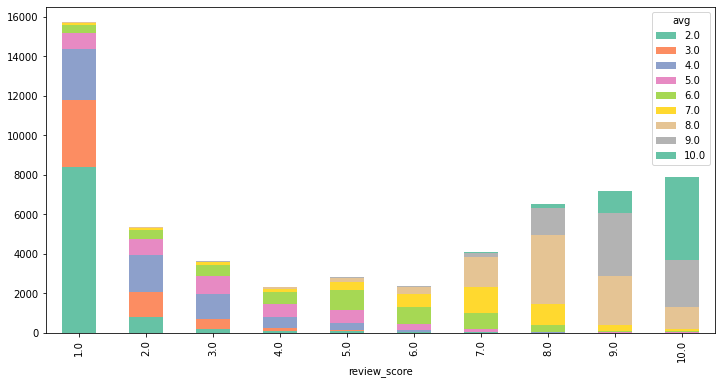

In [32]:
stacked_plot('avg')

In [33]:
airline_data['review_score'].fillna(value= airline_data['avg'],inplace = True) 


In [34]:
airline_data.drop(columns='avg',inplace = True)

In [35]:
airline_data.isnull().sum()

airline                0
review_score         143
review_date            0
review_text            0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

#### Filling other rating columns

In [36]:
airline_data['seat_comfort'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['cabin_service'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['food_bev'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['entertainment'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['ground_service'].fillna(value= airline_data['review_score'],inplace = True)
airline_data['value_for_money'].fillna(value= airline_data['review_score'],inplace = True)


In [37]:
airline_data.isnull().sum()

airline                0
review_score         143
review_date            0
review_text            0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort         143
cabin_service        143
food_bev             143
entertainment        143
ground_service       143
value_for_money      143
recommended         1422
dtype: int64

In [38]:
airline_data.dropna(subset = ['review_score'],inplace = True)

In [39]:
# re-ordering the index as rows are removed
airline_data.reset_index(drop=True,inplace = True)


In [40]:
airline_data.tail(2)

,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
61038,Ukraine International,4.0,4th May 2008,Kiev-Vienna. Check in was slow but after that ...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,no
61039,Ukraine International,3.0,2nd August 2007,VIE-ODS Business class. B737-500 either leased...,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,no


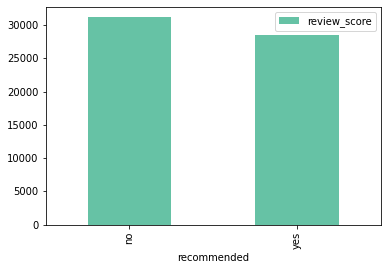

In [41]:
x = airline_data[['review_score','recommended']]
x.groupby(['recommended']).count().plot.bar() 

#### One hot encoding to fill travel type, cabin type

In [42]:
airline_data= pd.concat([airline_data,pd.get_dummies(airline_data['traveller_type'])],axis=1)


In [43]:
airline_data= pd.concat([airline_data,pd.get_dummies(airline_data['cabin'])],axis=1)

In [44]:
airline_data.tail(2)

,airline,review_score,review_date,review_text,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy
61038,Ukraine International,4.0,4th May 2008,Kiev-Vienna. Check in was slow but after that ...,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,no,0,0,0,0,0,0,0,0
61039,Ukraine International,3.0,2nd August 2007,VIE-ODS Business class. B737-500 either leased...,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,no,0,0,0,0,0,0,0,0


In [45]:
airline_data.drop(columns=['traveller_type','date_flown','route','cabin'],inplace= True)

####Adding new column pos_neg based on review_score 

Pos_neg - Feature based on review score. In this feature if review score is <=5 it a negative sentiment and filled with zero and if the review score is  >5 it is a positive sentiment and filled with one.

In [46]:
# classifying the review score into one of the 3 categories: Positive, Negative 
def classify_review_score(df):
    """
    Return:
    - 'pos' if the review score is positive (>5),
   
    - 'neg' if the review score is negative (<=5).
    """
    pos_neg= None

    if (df['review_score'] <= 5):
      pos_neg = 0
    
    else:
      pos_neg = 1
    return pos_neg


In [47]:
airline_data['pos_neg'] = airline_data.apply(lambda x: classify_review_score(x),axis=1)


In [48]:
airline_data.head(2)

,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg
0,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,8.0,10.0,8.0,8.0,4.0,8.0,yes,1,0,0,0,0,1,0,0,1
1,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,8.0,2.0,2.0,2.0,2.0,2.0,no,0,0,1,0,0,1,0,0,0


#### Handling dates

In [49]:
def date_timestamp(df_ , date_col):

  if (isinstance(df_[date_col],dt.datetime)):
    date_timestamp = df_[date_col]
  else:
    date_timestamp = dateutil.parser.parse(df_[date_col])
  return date_timestamp



In [50]:
airline_data['review_date'] = airline_data.apply(lambda x: date_timestamp(x, 'review_date'), axis=1)

In [51]:
airline_data.shape

(61040, 20)

In [52]:
# Fetch the date
def get_review_date_day(df_row):
    """
    Return the year of the review date.
    """
    
    review_date_day = df_row['review_date'].day
    return review_date_day

# Fetch the month
def get_review_date_month(df_row):
    """
    Return the year of the review date.
    """
    review_date_month = df_row['review_date'].month
    return review_date_month

# Fetch the year
def get_review_date_year(df_row):
    """
    Return the year of the review date.
    """
    review_date_year = df_row['review_date'].year
    return review_date_year

In [53]:

# Add other augmented features
airline_data['review_date_day'] = airline_data.apply(lambda x: get_review_date_day(x),axis=1)
airline_data['review_date_month'] = airline_data.apply(lambda x: get_review_date_month(x),axis=1)
airline_data['review_date_year'] = airline_data.apply(lambda x: get_review_date_year(x),axis=1)


In [54]:
airline_data.head()

,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg,review_date_day,review_date_month,review_date_year
0,Turkish Airlines,7.0,2019-05-08,âœ… Trip Verified | London to Izmir via Istanb...,8.0,10.0,8.0,8.0,4.0,8.0,yes,1,0,0,0,0,1,0,0,1,8,5,2019
1,Turkish Airlines,2.0,2019-05-07,âœ… Trip Verified | Istanbul to Bucharest. We ...,8.0,2.0,2.0,2.0,2.0,2.0,no,0,0,1,0,0,1,0,0,0,7,5,2019
2,Turkish Airlines,3.0,2019-05-07,âœ… Trip Verified | Rome to Prishtina via Ista...,2.0,8.0,2.0,6.0,2.0,4.0,no,1,0,0,0,0,1,0,0,0,7,5,2019
3,Turkish Airlines,10.0,2019-05-06,âœ… Trip Verified | Flew on Turkish Airlines I...,8.0,10.0,10.0,10.0,10.0,10.0,yes,0,0,0,1,0,1,0,0,1,6,5,2019
4,Turkish Airlines,1.0,2019-05-06,âœ… Trip Verified | Mumbai to Dublin via Istan...,2.0,2.0,2.0,2.0,2.0,2.0,no,0,0,0,1,0,1,0,0,0,6,5,2019


## Using VADER

In [55]:
sent_analysis = airline_data.copy()

In [56]:
# Downloading packages
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
# Initiating
sid = SentimentIntensityAnalyzer()


Cleaning customer review text

In [58]:
sent_analysis.iloc[1,:]['review_text']

'âœ… Trip Verified | Istanbul to Bucharest. We make our check in in the airport, they Take our luggage , we go to the gate and at the gate surprise they dont let uÈ™ board with two children, because they say the flight is overbooked. We had to wait in the airport with two children until 5 oclock in the morning until they bring uÈ™ to a hotel 2 hours far away from the airport without luggage, without eat without nothing. Our first and last flight with this airline.'

The first line of review is not required and can be removed. As the same data is seen in route column

In [59]:
# Split the string by the first occurrence of '.' and get the second part of the string.
sent_analysis['review_text'] = sent_analysis['review_text'].str.split('.',n=1,expand=True)[1]

In [60]:
sent_analysis.isnull().sum()

airline                 0
review_score            0
review_date             0
review_text            68
seat_comfort            0
cabin_service           0
food_bev                0
entertainment           0
ground_service          0
value_for_money         0
recommended          1404
Business                0
Couple Leisure          0
Family Leisure          0
Solo Leisure            0
Business Class          0
Economy Class           0
First Class             0
Premium Economy         0
pos_neg                 0
review_date_day         0
review_date_month       0
review_date_year        0
dtype: int64

In [61]:
sent_analysis.dropna(subset =['review_text'],inplace = True)

In [62]:
# copy review text to review list
reviews_list = sent_analysis['review_text'].copy()


### Adding polarity feature into sent_analysis data frame


In [63]:
# Augment the dataset with the overall polarity score of the review, as obtained using VADER on the review level.
reviews_polarity = []

for i_review, review in enumerate(reviews_list):
    # print('Review text:')
    
    #print(review)

    review_polarity_scores = sid.polarity_scores(review)
    review_polarity_score_compound = review_polarity_scores['compound']
    
    '''Uncomment this to print the sentiment score of every review in the dataset.
    
    print('Review #{:d}: '.format(i_review), end='')
    for key in sorted(review_polarity_scores.keys()):
        print('{}: {:.4f}, '.format(key,review_polarity_scores[key]), end='')
    print('')  '''
    
    reviews_polarity.append(review_polarity_score_compound)

In [64]:
# Adding polarity feature into sent_analysis data frame
sent_analysis['polarity'] = reviews_polarity


In [65]:
sent_analysis.head()

,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg,review_date_day,review_date_month,review_date_year,polarity
0,Turkish Airlines,7.0,2019-05-08,First time Iâ€™d flown TK. I found them very ...,8.0,10.0,8.0,8.0,4.0,8.0,yes,1,0,0,0,0,1,0,0,1,8,5,2019,0.9365
1,Turkish Airlines,2.0,2019-05-07,"We make our check in in the airport, they Tak...",8.0,2.0,2.0,2.0,2.0,2.0,no,0,0,1,0,0,1,0,0,0,7,5,2019,0.2732
2,Turkish Airlines,3.0,2019-05-07,I flew with this company several times in the...,2.0,8.0,2.0,6.0,2.0,4.0,no,1,0,0,0,0,1,0,0,0,7,5,2019,-0.9483
3,Turkish Airlines,10.0,2019-05-06,Turkish Airlines has consistently maintained ...,8.0,10.0,10.0,10.0,10.0,10.0,yes,0,0,0,1,0,1,0,0,1,6,5,2019,0.9764
4,Turkish Airlines,1.0,2019-05-06,Never book Turkish airlines if you are travel...,2.0,2.0,2.0,2.0,2.0,2.0,no,0,0,0,1,0,1,0,0,0,6,5,2019,-0.7599


In [66]:
# Mapping recommended column. Replacing yes with 1 and no with 0
sent_analysis['recommended'] = sent_analysis['recommended'].map({'yes':1 ,'no':0})

  

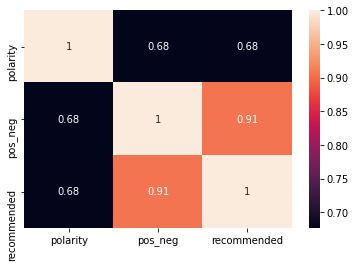

In [67]:
corr_values = sent_analysis[['polarity','pos_neg','recommended']].dropna(axis=0,how='any').corr()
# Get heatmap of correlation matrix on the dataset
plt.figure(figsize=(6,4))
sns.heatmap(corr_values,annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


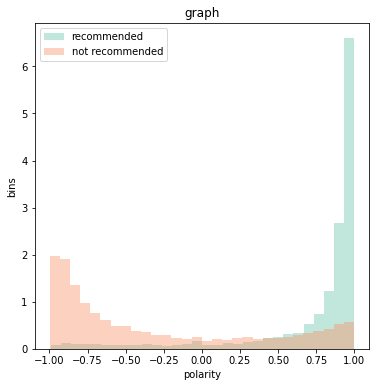

In [68]:
plt.figure(figsize=(6,6))
sns.distplot(sent_analysis[sent_analysis['recommended']== 1]['polarity'],hist=True,norm_hist=True,kde=False,label='recommended',bins=30)
sns.distplot(sent_analysis[sent_analysis['recommended']== 0]['polarity'],hist=True,norm_hist=True,kde=False,label='not recommended',bins=30)
plt.title('graph')
plt.xlabel('polarity')
plt.ylabel('bins')
plt.grid(False)
plt.legend(loc='best')
#plt.savefig(filename)
plt.show()

In [69]:
sent_analysis.head(5)

,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg,review_date_day,review_date_month,review_date_year,polarity
0,Turkish Airlines,7.0,2019-05-08,First time Iâ€™d flown TK. I found them very ...,8.0,10.0,8.0,8.0,4.0,8.0,1.0,1,0,0,0,0,1,0,0,1,8,5,2019,0.9365
1,Turkish Airlines,2.0,2019-05-07,"We make our check in in the airport, they Tak...",8.0,2.0,2.0,2.0,2.0,2.0,0.0,0,0,1,0,0,1,0,0,0,7,5,2019,0.2732
2,Turkish Airlines,3.0,2019-05-07,I flew with this company several times in the...,2.0,8.0,2.0,6.0,2.0,4.0,0.0,1,0,0,0,0,1,0,0,0,7,5,2019,-0.9483
3,Turkish Airlines,10.0,2019-05-06,Turkish Airlines has consistently maintained ...,8.0,10.0,10.0,10.0,10.0,10.0,1.0,0,0,0,1,0,1,0,0,1,6,5,2019,0.9764
4,Turkish Airlines,1.0,2019-05-06,Never book Turkish airlines if you are travel...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0,0,0,1,0,1,0,0,0,6,5,2019,-0.7599


Based on the we are able to see that polarity ranged from -1 to +1. polarity values greater than 0.7 mostly considered to be recommended else it is mostly not recommended

rec_nonrec - Feature based on polarity score. In this feature if score is <= 0.7 it a negative sentiment and filled with zero and if the score is  >0.7 it is a positive sentiment and filled with one.

In [70]:
# classifying the polarity into one of the 2 categories: Positive, Negative 
def classify_polarity_score(df):
    
    rec_nonrec = None

    if (df['polarity'] <= 0.7):
      rec_nonrec = 0
    
    else:
      rec_nonrec = 1
    return rec_nonrec


In [71]:
sent_analysis['rec_nonrec'] = sent_analysis.apply(lambda x: classify_polarity_score(x),axis=1)


In [72]:
sent_analysis.head(2)

,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg,review_date_day,review_date_month,review_date_year,polarity,rec_nonrec
0,Turkish Airlines,7.0,2019-05-08,First time Iâ€™d flown TK. I found them very ...,8.0,10.0,8.0,8.0,4.0,8.0,1.0,1,0,0,0,0,1,0,0,1,8,5,2019,0.9365,1
1,Turkish Airlines,2.0,2019-05-07,"We make our check in in the airport, they Tak...",8.0,2.0,2.0,2.0,2.0,2.0,0.0,0,0,1,0,0,1,0,0,0,7,5,2019,0.2732,0


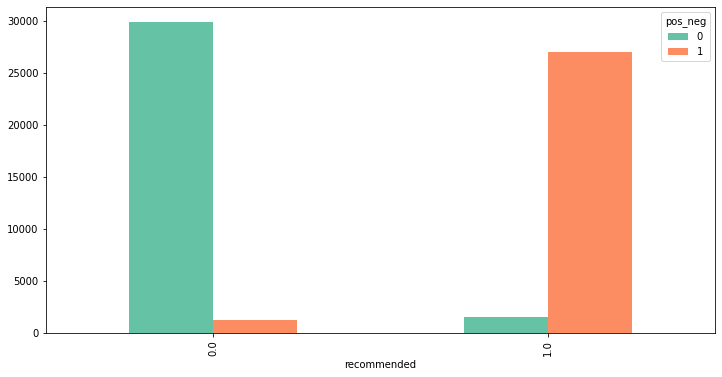

In [73]:
# Plot showing relation between pos_neg and recommended feature
x = sent_analysis.groupby([sent_analysis['recommended']])
x['pos_neg'].value_counts().unstack().plot(kind= 'bar', figsize=(12,6))


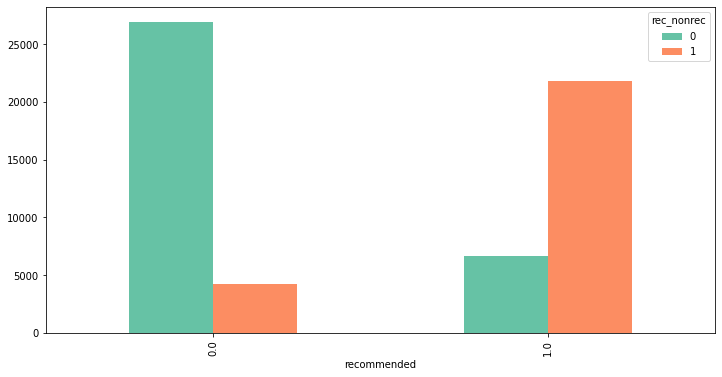

In [74]:
# Plot showing relation between rec_nonrec and recommended feature
x = sent_analysis.groupby([sent_analysis['recommended']])
x['rec_nonrec'].value_counts().unstack().plot(kind= 'bar', figsize=(12,6))


From the above two plots we can infere how much percentage of classes will get cross filled if recommended column is filled with those features

In [75]:
mask_differents = sent_analysis.pos_neg != sent_analysis.rec_nonrec
differences = sent_analysis[mask_differents]
print('There are {:.2%} different values between review score sentiment and Compound Sentiment'.format(differences.shape[0] / sent_analysis.shape[0]))
print('No of rows with different values:',differences.shape[0])
differences.sample(2)

There are 18.47% different values between review score sentiment and Compound Sentiment
No of rows with different values: 11264


,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg,review_date_day,review_date_month,review_date_year,polarity,rec_nonrec
5746,Lufthansa,8.0,2014-09-14,Clean sufficiently comfortable. No power acce...,6.0,6.0,6.0,10.0,8.0,8.0,1.0,0,0,0,0,0,1,0,0,1,14,9,2014,0.4939,0
41733,SAS Scandinavian,4.0,2016-04-10,Can't believe that you have to pay for everyt...,4.0,4.0,2.0,4.0,2.0,4.0,0.0,0,1,0,0,0,1,0,0,0,10,4,2016,0.7190,1


In [76]:
mask_differents_rev_rec = sent_analysis.pos_neg != sent_analysis.recommended
differences_rev_rec = sent_analysis[mask_differents_rev_rec]
print('There are {:.2%} different values between review score sentiment and Compound Sentiment'.format(differences_rev_rec.shape[0] / sent_analysis.shape[0]))
print('No of rows with different values:',differences_rev_rec.shape[0])
differences.sample(2)

There are 6.80% different values between review score sentiment and Compound Sentiment
No of rows with different values: 4147


,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg,review_date_day,review_date_month,review_date_year,polarity,rec_nonrec
17733,Air Canada,10.0,2018-06-18,Blessed by the Air Canada staff at the Pittsb...,6.0,10.0,4.0,10.0,10.0,10.0,1.0,0,0,1,0,0,1,0,0,1,18,6,2018,0.5994,0
25672,China Southern Airlines,9.0,2019-04-13,"It was not a busy flight, so itâ€™s very quie...",10.0,10.0,10.0,8.0,10.0,10.0,1.0,0,0,0,1,1,0,0,0,1,13,4,2019,0.6249,0


In [77]:
mask_differents_rev_rec = sent_analysis.rec_nonrec != sent_analysis.recommended
differences_rev_rec = sent_analysis[mask_differents_rev_rec]
print('There are {:.2%} different values between review score sentiment and Compound Sentiment'.format(differences_rev_rec.shape[0] / sent_analysis.shape[0]))
print('No of rows with different values:',differences_rev_rec.shape[0])
differences.sample(2)

There are 20.07% different values between review score sentiment and Compound Sentiment
No of rows with different values: 12235


,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg,review_date_day,review_date_month,review_date_year,polarity,rec_nonrec
53413,Bangkok Airways,10.0,2010-12-31,Wheelchair and my own carer. Have flown with ...,10.0,10.0,10.0,10.0,10.0,8.0,1.0,0,0,0,0,0,1,0,0,1,31,12,2010,0.6763,0
24399,British Airways,5.0,2014-09-06,Either it came up from the BA Rep. or my husb...,8.0,6.0,10.0,2.0,5.0,2.0,0.0,0,0,0,0,1,0,0,0,0,6,9,2014,0.9711,1


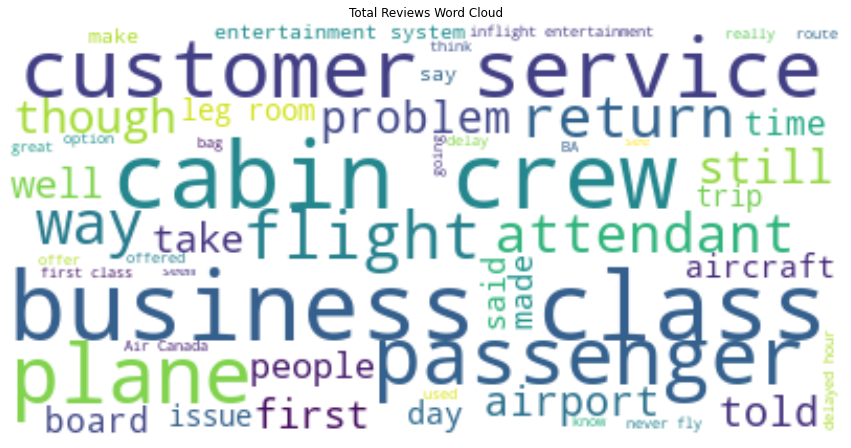

In [83]:
# Import all necesary libraries
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
 
# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)
 
# Add some extra words ad hoc for our purpose
words_ = ['even','given','flight','found','asked','will','now','got','although','one']
stopwords.update(words_)
 
# join all reviews
text = " ".join(review for review in sent_analysis.review_text)
 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(text)

# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Cloud')

plt.show()

From the word cloud we are able to see that the customer in the review is talking about cabin crew, customer service, business class, issues and problems.

In [84]:
sent_analysis.isnull().sum()

airline                 0
review_score            0
review_date             0
review_text             0
seat_comfort            0
cabin_service           0
food_bev                0
entertainment           0
ground_service          0
value_for_money         0
recommended          1357
Business                0
Couple Leisure          0
Family Leisure          0
Solo Leisure            0
Business Class          0
Economy Class           0
First Class             0
Premium Economy         0
pos_neg                 0
review_date_day         0
review_date_month       0
review_date_year        0
polarity                0
rec_nonrec              0
dtype: int64

In [85]:
sent_analysis.dropna(how= 'any', inplace = True)

In [86]:
sent_analysis.head(2)

,airline,review_score,review_date,review_text,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,pos_neg,review_date_day,review_date_month,review_date_year,polarity,rec_nonrec
0,Turkish Airlines,7.0,2019-05-08,First time Iâ€™d flown TK. I found them very ...,8.0,10.0,8.0,8.0,4.0,8.0,1.0,1,0,0,0,0,1,0,0,1,8,5,2019,0.9365,1
1,Turkish Airlines,2.0,2019-05-07,"We make our check in in the airport, they Tak...",8.0,2.0,2.0,2.0,2.0,2.0,0.0,0,0,1,0,0,1,0,0,0,7,5,2019,0.2732,0


###Analysis on airline

In [87]:
print('Total no.of unique airlines:', len(sent_analysis['airline'].unique()) )# No.of unique airline lines

Total no.of unique airlines: 81


## Logistic regression



In [88]:
X = sent_analysis[['pos_neg','rec_nonrec']].copy()
y = sent_analysis['recommended'].copy()

In [89]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(47692, 2)
(11923, 2)


In [90]:
y_train.value_counts()

0.0    24930
1.0    22762
Name: recommended, dtype: int64

In [91]:
y_test.value_counts()

0.0    6202
1.0    5721
Name: recommended, dtype: int64

In [92]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
# Get the model coefficients
clf.coef_

array([[5.4140131 , 1.65267779]])

In [94]:
# Get the predicted probabilities
train_prob = clf.predict_proba(X_train)
test_prob = clf.predict_proba(X_test)

In [95]:
test_prob

array([[0.11628733, 0.88371267],
       [0.02458454, 0.97541546],
       [0.84982989, 0.15017011],
       ...,
       [0.02458454, 0.97541546],
       [0.02458454, 0.97541546],
       [0.96726239, 0.03273761]])

In [96]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [97]:
train_class_preds

array([1., 0., 0., ..., 0., 0., 1.])

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [99]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)*100
test_accuracy = accuracy_score(test_class_preds,y_test)*100

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  95.27384047639018
The accuracy on test data is  95.50448712572339


In [100]:
# Get the confusion matrix for both train and test

cm1 = confusion_matrix(y_train, train_class_preds)
print('confusion matrix of train \n', cm1)

cm2 = confusion_matrix(y_test, test_class_preds)
print('confusion matrix of test \n', cm2)


confusion matrix of train 
 [[23902  1028]
 [ 1226 21536]]
confusion matrix of test 
 [[5955  247]
 [ 289 5432]]


In [101]:
# Getting all the accuracy metrics of training model
tn, fp, fn, tp = confusion_matrix(y_train, train_class_preds).ravel()

sensitivity = tp / (tp+fn) # Recall.
specificity = tn / (tn+fp)
precision = tp / (tp+fp)

print('Sensitivity/Recall: %.3f' % sensitivity)
print('Specificity: %.3f' % specificity)
print('Precision: %.3f' % precision)

Sensitivity/Recall: 0.946
Specificity: 0.959
Precision: 0.954


In [102]:
# Getting all the accuracy metrics of test model
tn, fp, fn, tp = confusion_matrix(y_test, test_class_preds).ravel()

sensitivity = tp / (tp+fn) # Recall.
specificity = tn / (tn+fp)
precision = tp / (tp+fp)

print('Sensitivity/Recall: %.3f' % sensitivity)
print('Specificity: %.3f' % specificity)
print('Precision: %.3f' % precision)

Sensitivity/Recall: 0.949
Specificity: 0.960
Precision: 0.957


## Decision trees

In [103]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [104]:
 df = sent_analysis.drop(columns = ['airline','review_date','review_text', 'rec_nonrec', 'pos_neg']).copy()

In [105]:
df.head(2)

,review_score,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Business,Couple Leisure,Family Leisure,Solo Leisure,Business Class,Economy Class,First Class,Premium Economy,review_date_day,review_date_month,review_date_year,polarity
0,7.0,8.0,10.0,8.0,8.0,4.0,8.0,1.0,1,0,0,0,0,1,0,0,8,5,2019,0.9365
1,2.0,8.0,2.0,2.0,2.0,2.0,2.0,0.0,0,0,1,0,0,1,0,0,7,5,2019,0.2732


In [106]:
X = df.drop(columns='recommended').copy()

y = df['recommended'].copy()

In [107]:
# Considering only two features
#X = sent_analysis[['pos_neg','rec_nonrec']].copy()
#y = sent_analysis['recommended'].copy()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=324)

In [109]:
decision_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [110]:
y_predicted = decision_classifier.predict(X_test)
y_train_pred = decision_classifier.predict(X_train)

In [111]:
y_predicted[:10]

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1.])

In [112]:
print("The accuracy on test data is ", accuracy_score(y_predicted, y_test) * 100) # Accuracy of test data


The accuracy on test data is  95.42633491752865


In [113]:
print("The accuracy on test data is ",accuracy_score(y_train_pred, y_train) * 100) # Accuracy of test data


The accuracy on test data is  95.27438293793435


In [114]:
features = X_train.columns
importances = decision_classifier.feature_importances_
indices = np.argsort(importances) 

In [115]:
features


Index(['review_score', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'Business',
       'Couple Leisure', 'Family Leisure', 'Solo Leisure', 'Business Class',
       'Economy Class', 'First Class', 'Premium Economy', 'review_date_day',
       'review_date_month', 'review_date_year', 'polarity'],
      dtype='object')

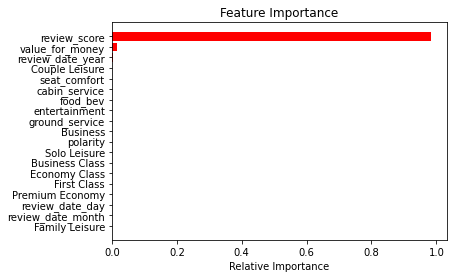

In [116]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [117]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

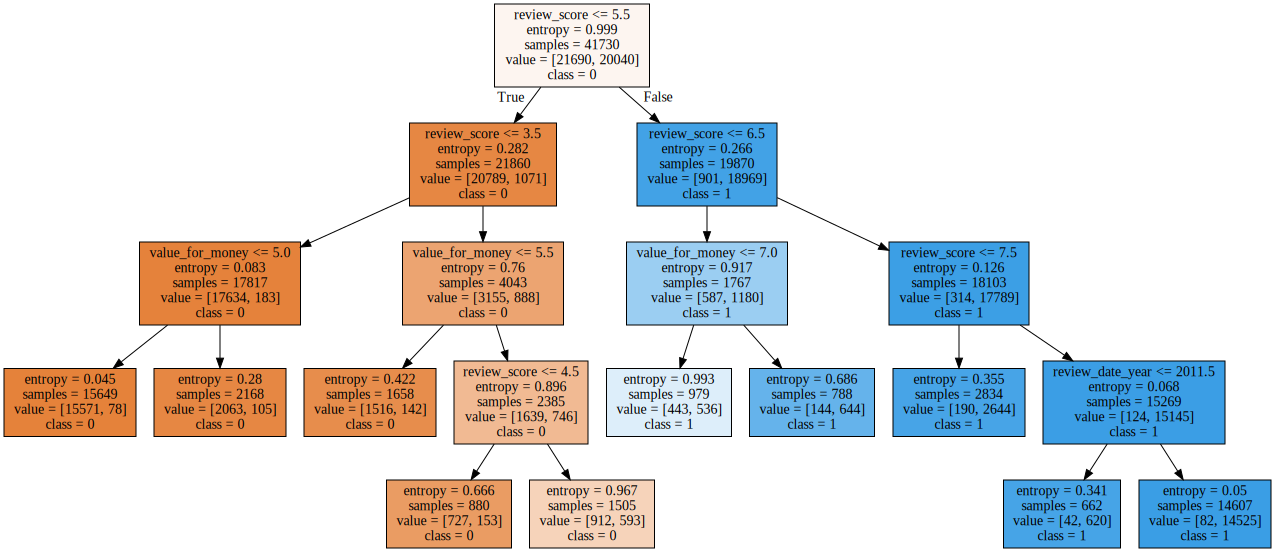

In [118]:
graph = Source(tree.export_graphviz(decision_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))
